# <center> Where To Look For A Movie Rating? (A Data Science Approach)</center>
---

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This is the Jupyter Notebook version of [this Medium article](https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19). The notebook aims to show that all the quantitative and visual elements presented in the article are reproducible. The notebook is self-contained as the article's written content was also added.


### Rating, Review Or Trailer?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Whenever we’re trying to decide whether to watch a certain movie or not, we could consider a lot of factors (the director, the actors, the movie’s budget etc.), but most of us only resume to reading a couple of reviews, watching a short trailer, or just quickly checking the movie’s rating. 
There are a few good reasons you would want to avoid reading reviews, or watching a trailer, although they bring much more information than a rating. 
First, you may want to completely avoid spoilers, no matter how small. I understand that! 
Second, it could be that you want an uninfluenced experience of watching that movie. This usually applies only to reviews, which are sprinkled with frames, like “this is a movie about the complexity of the universe” or “this movie is really not about love”. Once these frames get encoded in your short-term memory, it’s really hard to stop them from interfering with your own movie experience.
Another good reason is that if you are tired or hurried, you might find it pretty uncomfortable to read a review, or even watch a 2-minute trailer. 
So, a movie rating seems to be the solution in quite a few situations, for quite a few people. This article aims to recommend one single place to look quickly for a movie rating, offering a robust argumentation for that.


### Criteria For *“The Best”*

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Making such a recommendation it’s a lot like saying “this is the best place to look for a movie rating”, which is an evaluative statement, resting on some criteria used to determine what is better, what is worse or worst, and what is best, in this case. For my recommendation I will use one single criterion: a normal distribution.
The best place to look for a movie rating is that whose ratings are distributed in a pattern which resembles the most, or is identical to, the pattern of a normal distribution, which is this: given a set of values lying in a certain interval, most of them are in the middle of it, and the few others at that interval’s extremes. Generally, this is how a normal (also called Gaussian) distribution looks like:

In [1]:
# Importing .pyplot
import matplotlib.pyplot as plt
%matplotlib inline

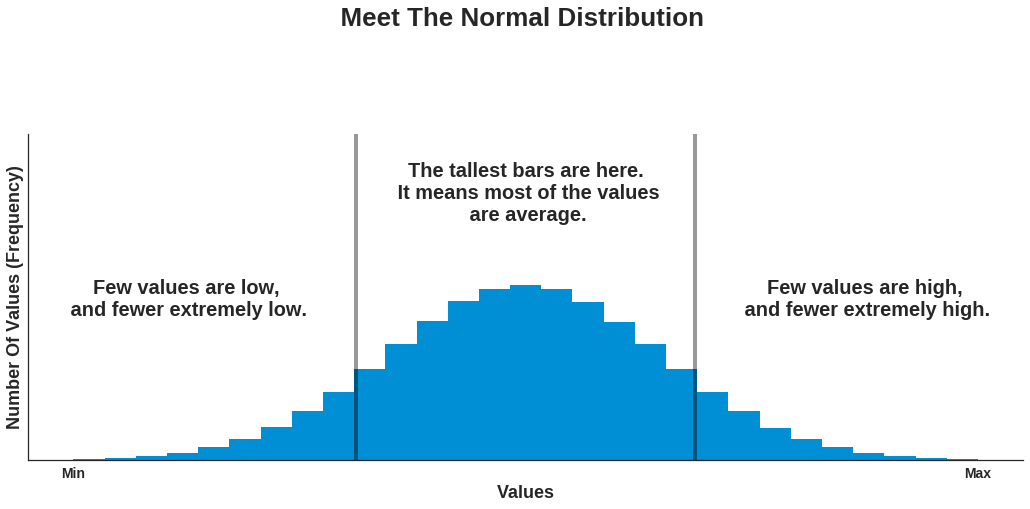

In [43]:
# Change the default style
plt.style.use('seaborn-white')

# Generate a figure with a single ax
fig, ax = plt.subplots(figsize = (18,9))

# Generate a hist on the ax
from numpy.random import normal
ax.hist(normal(size = 1000000, scale = 6), bins = 29, range = (-20, 20))

# Hide spines and remove grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

# Axes labels
ax.set_ylabel('Number Of Values (Frequency)', fontsize = 18, weight = 'bold')
ax.set_xlabel('Values', fontsize = 18, weight = 'bold')

# Tweak tick parameters
ax.set_yticks([0, 170000])
ax.tick_params(axis = 'both', which = 'both', labelleft = False)

ax.set_xticks([-20,20])
ax.set_xticklabels(['Min', 'Max'], fontsize = 14, weight = 'bold')

# Title
fig.suptitle('  Meet The Normal Distribution', fontsize = 26, weight = 'bold')

# Delimiting areas by generating vertical lines
ax.axvline(-7.5, color = 'black', alpha = 0.4)
ax.axvline(7.5, color = 'black', alpha = 0.4)

# Explanatory text
ax.text(0,125000, 'The tallest bars are here.\n It means most of the values\n are average.', fontsize = 20,
        weight = 'bold', ha ='center')
ax.text(-15,75000, 'Few values are low,\n and fewer extremely low.', fontsize = 20, weight = 'bold', ha ='center')
ax.text(15,75000, 'Few values are high,\n and fewer extremely high.', fontsize = 20, weight = 'bold', ha ='center')

# Increase pad btw the title and graph
plt.tight_layout(pad = 10)

plt.show()

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What’s the rationale behind this criterion? Well, from my own experience consisting of several hundred movies, I can tell that I’ve seen a few outstanding ones that I’ve watched several times, a couple that were really appalling, and made me regret the time spent watching them, and a whole bunch of average ones for most of which I can’t even remember the plot anymore. 
I believe that most of the people, whether critics, cinephiles, or just regular moviegoers, have had the same experience.
If movie ratings express indeed movie quality, then we should see the same pattern for both. Given that most of us asses the bulk of movies as being of an average quality, we should see the same pattern when we analyze movie ratings. A similar logic applies for bad and good movies.
If you are not yet persuaded that there should be such a correspondence between the patterns, think about the distribution of ratings for a single movie. As many people rate the movie, it is not a leap of faith to assume that most often there will be many of them having quite the same preferences, and, consequently, agreeing that the movie is either bad, average, or good (I will quantify later these qualitative values). Also, there will be a few others who assess the movie with one of the other two qualitative values. 
If we took all the ratings for an individual movie, and visualized their distribution, we would most likely see that one single cluster forms in one of the areas corresponding to a low, an average, or a high rating. Provided most movies are considered average, the cluster around the average area has the greatest likelihood of occurring, and the other two clusters have a smaller (but still significant) likelihood (all these likelihoods can be quantified in principle, but this would require a lot of data, and would have the potential to turn this article into a book). 
The least likely would be a uniform distribution in which there are no clusters, and people’s preferences are split almost equally across the three qualitative values. 
Given these likelihoods, the distribution of ratings for a large enough sample of movies should be one with a blunt cluster in the average area, bordered by bars of decreasing height (frequency), resembling, thus, a normal distribution. If you have found this hard to understand, consider this illustration:

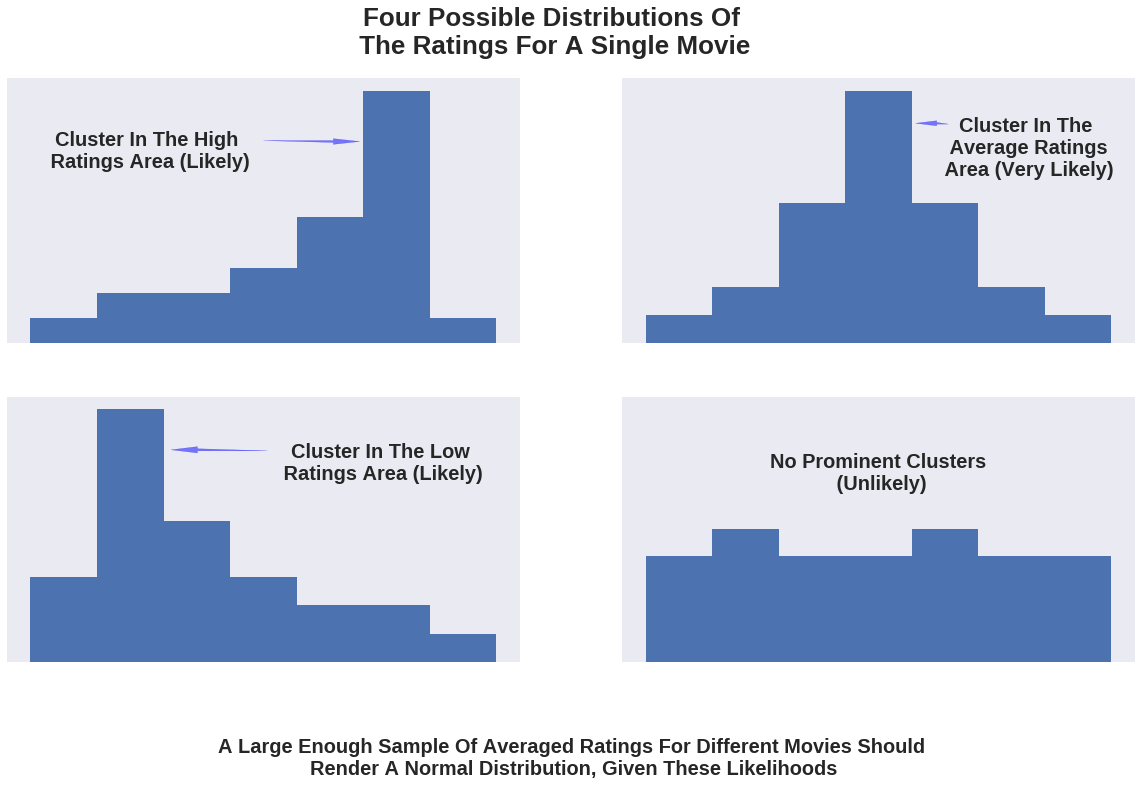

In [44]:
# Change the default style
plt.style.use('seaborn')

# Generate a figure with 4 axes (2 rows by 2 columns)
fig = plt.figure(figsize = (18,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Removie tick marks, labels and grids for all axes
for ax in fig.axes:
    ax.tick_params(axis = 'both', which = 'both', labelleft = False, labelbottom = False)
    ax.grid(False)

# Values for hists
bad = [0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4,4,5,5,6]
average = [0,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,5,5,6]
good = [0,1,1,2,2,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6]
uniform = [0,0,0,0,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,6,6,6,6]

# Good cluster ax 
ax1.hist(good, bins = 7)

# Average cluster ax
ax2.hist(average, bins = 7)

# Bad cluster ax
ax3.hist(bad, bins = 7)

# Uniform cluster ax
ax4.hist(uniform, bins = 7)
ax4.set_ylim(0,10) # makes the bin's height appear shorter

# Text and arrows
fig.suptitle('Four Possible Distributions Of\n The Ratings For A Single Movie', fontsize = 26, 
             weight = 'bold')

ax1.text(1.5,7,'Cluster In The High\n Ratings Area (Likely)', fontsize = 20, weight = 'bold', ha = 'center')
ax1.arrow(3,8,0.9,0, width = 0.075, color = 'b', alpha = 0.5)

ax2.text(4.9,6, 'Cluster In The\n Average Ratings\n Area (Very Likely)', fontsize = 20, weight = 'bold',
         ha = 'center')
ax2.arrow(3.90,7.85,-0.15,0, width = 0.060, color = 'b', alpha = 0.5)

ax3.text(4.5,6.5, 'Cluster In The Low\n Ratings Area (Likely)', fontsize = 20, weight ='bold', ha = 'center')
ax3.arrow(3.05,7.55,-0.9,0, width = 0.075, color = 'b', alpha = 0.5)

ax4.text(3,6.5, 'No Prominent Clusters\n (Unlikely)', fontsize = 20, weight = 'bold', ha = 'center')

ax3.text(7,-4,'''A Large Enough Sample Of Averaged Ratings For Different Movies Should 
Render A Normal Distribution, Given These Likelihoods''', fontsize = 20, weight = 'bold', ha ='center')

plt.show()

### IMDB, Rotten Tomatoes, Fandango Or Metacritic?



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now that there’s a criterion to work with, let’s proceed with analyzing some data. 
There are a lot of websites out there that come up with their own movie ratings, but I have chosen only four, mainly based on their popularity, so I could get ratings for movies with an acceptable number of votes. The happy winners are [IMDB][1], [Fandango][2], [Rotten Tomatoes][3], and [Metacritic][4]. 
For the last two, I have focused only on their iconic rating types, namely the tomatometer, and the metascore, mainly because these are more visible to the user on each of the websites (meaning it’s quicker to find them), and are also shared on the other two websites (the metascore is shared on IMDB and the tomatometer on Fandango). Besides these iconic ratings, both websites also have a less featured rating type where only users get to contribute.
I have collected ratings for some of the most voted and reviewed movies in 2016 and 2017. The cleaned dataset has ratings for 214 movies, and can be downloaded from [this Github repo][5]. I haven’t collected ratings for movies released before 2016, simply because a slight change has occurred in Fandango’s rating system, soon after [Walt Hickey’s analysis][6], which I will refer to later in this article. I am aware that working with a small sample is risky, but at least is compensated in this case by getting the most recent snapshot of the ratings’ distributions.
Before plotting and interpreting the distributions, I need to quantify the qualitative values I’ve used earlier: on a 0 to 10 scale, a bad movie is somewhere between 0 and 3, an average one between 3 and 7, and a good one between 7 and 10. 
Please take note of the distinction between quality and quantity. To keep it discernible in what follows, I will refer to ratings (quantity) as being low, average, or high. As before, the movie quality is expressed as bad, average, or good. If you worry about the “average” term being the same, don’t, because I will take care to avoid any ambiguity. 
Now let’s take a look at the distributions:

[1]: http://www.imdb.com
[2]: http://www.fandango.com
[3]: https://rottentomatoes.com
[4]: http://www.metacritic.com/
[5]: https://github.com/mircealex/Movie_ratings_2016_17
[6]: https://fivethirtyeight.com/features/fandango-movies-ratings/

In [3]:
# Import pandas
import pandas as pd

In [4]:
# Read in the dataset
new_ds = pd.read_csv('movie_ratings_16_17.csv')

# Print some info to help the reader understand the structure of the dataset
print(new_ds.shape)
new_ds.head(5) # Check the github link given to understand what the values of each column describe

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


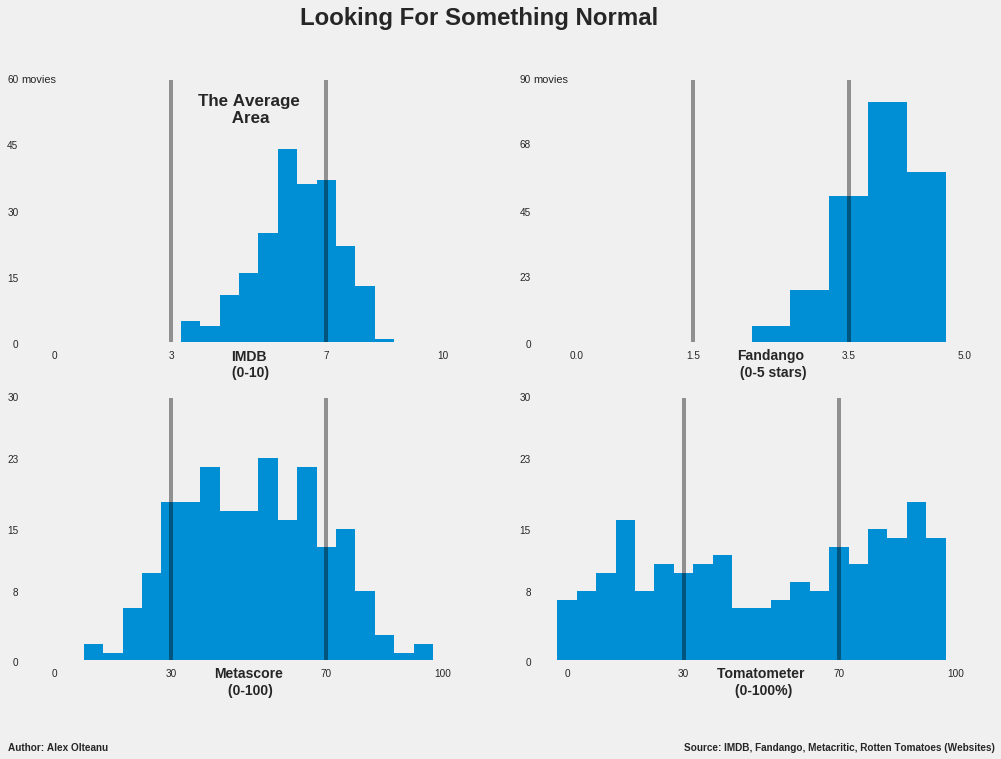

In [45]:
# Use the FTE style
plt.style.use('fivethirtyeight')

# Generate a figure with 4 axes (2 rows by 2 columns)
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Remove grids for all axes
for ax in fig.axes:
    ax.grid(False)

    
# IMDB
ax1.hist(new_ds.imdb, bins = 20, range = (0,10), align = 'left') # bin range = 0.5
ax1.axvline(3, color = 'black', alpha = 0.4)
ax1.axvline(7, color = 'black', alpha = 0.4)
ax1.set_ylim(0, 60)
ax1.text(5,50, 'The Average\n Area', fontsize = 17, weight = 'bold', ha = 'center')
ax1.set_yticks([0,15,30,45,60])
ax1.set_xticks([0,3,7,10])
ax1.text(5,-7.5, 'IMDB\n (0-10)', fontsize = 14, weight = 'bold', ha = 'center')
ax1.text(-0.86,59.2, 'movies', fontsize = 11)


# Fandango
ax2.hist(new_ds.fandango, bins = 10, range = (0,5), align = 'left') # bin range = 0.5
ax2.axvline(1.5, color = 'black', alpha = 0.4)
ax2.axvline(3.5, color = 'black', alpha = 0.4)
ax2.set_ylim(0,90)
ax2.set_yticks([0,23,45,68,90])
ax2.set_xticks([0,1.5,3.5,5])
ax2.text(2.5,-11, 'Fandango\n (0-5 stars)', fontsize = 14, weight = 'bold', ha = 'center')
ax2.text(-0.56,88.7, 'movies', fontsize = 11)


# Metacritic
ax3.hist(new_ds.metascore, bins = 20, range = (0,100), align = 'left') 
# bin range = 5 (equivalent to 0.5 if normalized to 0-10)
ax3.axvline(30, color = 'black', alpha = 0.4)
ax3.axvline(70, color = 'black', alpha = 0.4)
ax3.set_ylim(0,30)
ax3.set_yticks([0,8,15,23,30])
ax3.set_xticks([0,30,70,100])
ax3.text(50,-3.65, 'Metascore\n (0-100)', fontsize = 14, weight = 'bold', ha = 'center')

# RT
ax4.hist(new_ds.tmeter, bins = 20, range = (0,100), align = 'left') # bin range = 5 
ax4.axvline(30, color = 'black', alpha = 0.4)
ax4.axvline(70, color = 'black', alpha = 0.4)
ax4.set_ylim(0,30)
ax4.set_yticks([0,8,15,23,30])
ax4.set_xticks([0,30,70,100])
ax4.text(50,-3.65, 'Tomatometer\n (0-100%)', fontsize = 14, weight = 'bold', ha = 'center')

# Text
fig.suptitle('Looking For Something Normal', fontsize = 24, weight = 'bold')
ax3.text(-12,-10, 'Author: Alex Olteanu', fontsize = 10, weight = 'bold')
ax4.text(30,-10, 'Source: IMDB, Fandango, Metacritic, Rotten Tomatoes (Websites)', fontsize = 10, weight = 'bold')

plt.show()


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; At a simple glance, it can be noticed that the metascore’s [histogram][1] (that’s how this kind of graph is called) resembles the most a normal distribution. It has a thick cluster in the average area composed of bars of irregular heights, which makes the top neither blunt, neither sharp. However, they are more numerous and taller than  the bars in each of the other two areas, which decrease in height towards extremes, more or less gradually. All these clearly indicate that most of the metascores have an average value, which is pretty much what we’re looking for.
In the case of IMDB, the bulk of the distribution is in the average area as well, but there is an obvious skew towards the highest average values. The high ratings area looks similar to what would be expected to be seen for a normal distribution in that part of the histogram. However, the striking feature is that the area representing low movie ratings is completely empty, which raises a big question mark. Initially, I put the blame on the small sample, thinking that a larger one would do more justice to IMDB. Luckily, I was able to find [a ready-made dataset on Kaggle][2] containing IMDB ratings for 4917 different movies. To my great surprise, the distribution looked like this:


[1]: http://www.datavizcatalogue.com/methods/histogram.html
[2]: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

In [6]:
# Read in the dataset
ds = pd.read_csv('movie_metadata.csv') # I removed a few duplicates before importing

# Make the dataset easier to be processed
titles = ds[['movie_title', 'imdb_score']]

# Drop rows with missing scores
titles = titles.dropna(subset = ['imdb_score'])
titles.shape

(4917, 2)

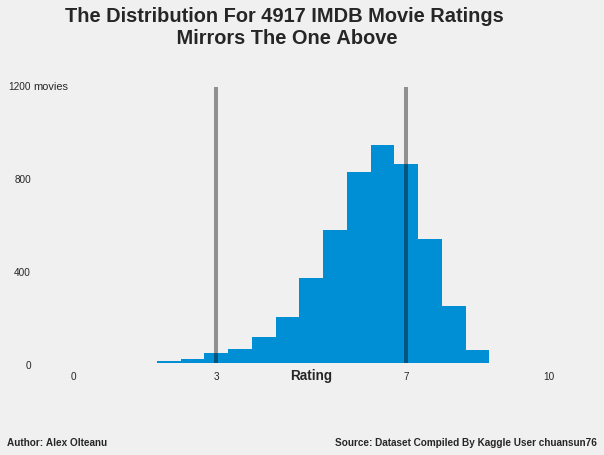

In [7]:
# Keep the FTE style

# Add one ax
fig, ax = plt.subplots()
fig.set_size_inches(10,6.5)
ax.grid(False) # removes the grid

# Generate the hist
ax.hist(titles.imdb_score, bins = 20, range = (0,10), align = 'left') # bin range = 0.5
ax.set_yticks([0,400,800,1200])
ax.set_xticks([0,3,7,10])
ax.axvline(3, color = 'black', alpha = 0.4)
ax.axvline(7, color = 'black', alpha = 0.4)
fig.suptitle('The Distribution For 4917 IMDB Movie Ratings\n Mirrors The One Above',fontsize = 20,
             weight = 'bold')

# Increase the pad btw title and graph; this function works well when dealing with one ax
plt.tight_layout(pad = 6)

# Text
ax.text(-0.85,1180, 'movies', fontsize = 11)
ax.text(5, -65, 'Rating', fontsize = 13.5, weight = 'bold', ha = 'center')
ax.text(-1.4, -350, 'Author: Alex Olteanu', fontsize = 10, weight = 'bold')
ax.text(5.5, -350, 'Source: Dataset Compiled By Kaggle User chuansun76', fontsize = 10, weight = 'bold')

plt.show()






&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The shape of the distribution looks almost the same as that for the sample with 214 movies, except for the low ratings area, which is in this case feebly populated with 46 movies (out of 4917). The bulk of the values is still in the average area, which makes the IMDB rating worth considering further for a recommendation, although is clearly hard to rival the metascore, with that skew. 
Anyway, what’s really great about this outcome, is that it can be used as a strong argument to support the thesis that the 214-movies sample is fairly representative for the whole population. In other words, there’s a greater confidence now that the results of this analysis would be the same, or at least similar, to the results reached if absolutely all the movie ratings from all the four websites were analyzed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; With this increased confidence, let’s move on to examining the distribution of Fandango’s ratings, which doesn’t seem to have changed much since Hickey’s analysis. The skew is still visibly towards the higher part of the movie rating spectrum, where most of the ratings reside. The area for the lower half of the average ratings is completely empty, just like the one for bad ratings. It can easily be concluded that the distribution is quite far from fitting my criterion. Consequently, I won’t consider it further for a possible recommendation. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Lastly, the tomatometer’s distribution is unexpectedly uniform, and would look even flatter under a different binning strategy. This distribution is not easy to interpret in context, because the tomatometer it’s not a classical rating, but rather represents the percentage of critics who gave a positive review to a movie. This makes it unfit for the bad-average-good framework, because it makes movies either good, either bad. Anyway, I guess it should still boil down to the same normal distribution, with most of the movies having a moderate difference between the number of positive reviews and the negative ones (rendering many ratings of 30% - 70% positive reviews), and a few movies having a significantly bigger difference, in one way or the other. Given this consideration, and the shape of the distribution, the tomatometer doesn’t meet my criterion. It *could* be that a larger sample would do it more justice, but even if I were to recommend it, I would do it with some reserves because of the vague positive or negative rating system.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; At this point of the analysis, I could say that by looking at the distributions, my recommendation is the metascore. 
However, the IMDB’s distribution seems to be worth considering as well, especially if you tweak a little the rating intervals for the three qualitative categories (intervals which I defined myself, more or less arbitrarily). From this perspective, recommending the metascore by mostly doing a visual examination is clearly not enough.
So, I will try to delimit between these two by using a quantitative method.
The idea is to use the Fandango variable as a negative reference, and then determine which variable, from the IMDB rating and the metascore, is the least correlated with it (I call these variables because they can take different values — for example, the metascore is a variable because it takes different values, depending on the movie). 
I will simply compute some correlation coefficients, and the variable with the smallest value will be my recommendation (I will explain then how these correlation coefficients work). But before that, let me briefly justify choosing the Fandango variable as a negative reference.



### Fandango’s users love movies simply too much

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; One reason for this choice is that the distribution of Fandango’s movie ratings is the furthest from that of a normal one, having that obvious skew towards the higher part of the movie ratings spectrum. 
The other reason is the cloud of suspicion around Fandango left by [Walt Hickey’s analysis][1]. On October 2015, he was also puzzled by a similar distribution, and discovered that on Fandango’s website the numerical ratings were always rounded to the next highest half-star, not to the nearest one (for example, a 4.1 average rating for a movie would have been rounded to 4.5 stars, instead of 4.0).
The Fandango team fixed the biased rating system, and replied Hickey that the rating logic was rather a “software glitch” on their website, pointing towards an unbiased system on their mobile app (more about this on Hickey’s article). The adjustment did change some statistical parameters for the better, but not enough to convince me not to work with the Fandango variable as a negative reference. This is how the change looks like:

[1]: https://fivethirtyeight.com/features/fandango-movies-ratings/

In [8]:
# Importing Hickey's dataset to use for generating a comparative graph
fte_ds = pd.read_csv('fandango_score_comparison.csv')
print(fte_ds.shape)
fte_ds.head(3)

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [9]:
###### Generate a figure with two axes containing comparative line plots ######

### Getting the values ###
'''First, get the values and their frequencies. Then, normalize the frequencies to percent, so you can compare
the two datasets which have different number of datapoints.'''


# Fandango
fdg_vals = new_ds.fandango.value_counts(normalize = True).sort_index() * 100 
# 'normalize' gives the quotient of (frequency of a value/total nr of values); multiply by 100 to get percentages
# Sort all indexes, otherwise the line plots will look chaotic;
fte_fdg = fte_ds.Fandango_Stars.value_counts(normalize = True).sort_index() * 100

# Metascore
ms_vals = new_ds.nr_metascore.value_counts(normalize = True).sort_index() * 100
fte_ms = fte_ds.Metacritic_norm_round.value_counts(normalize = True).sort_index() * 100

# IMDB
imdb_vals = new_ds.nr_imdb.value_counts(normalize = True).sort_index() * 100
fte_imdb = fte_ds.IMDB_norm_round.value_counts(normalize = True).sort_index() * 100

# Tomatometer
tmeter_vals = new_ds.nr_tmeter.value_counts(normalize = True).sort_index() * 100
fte_tmeter = fte_ds.RT_norm_round.value_counts(normalize = True).sort_index() * 100

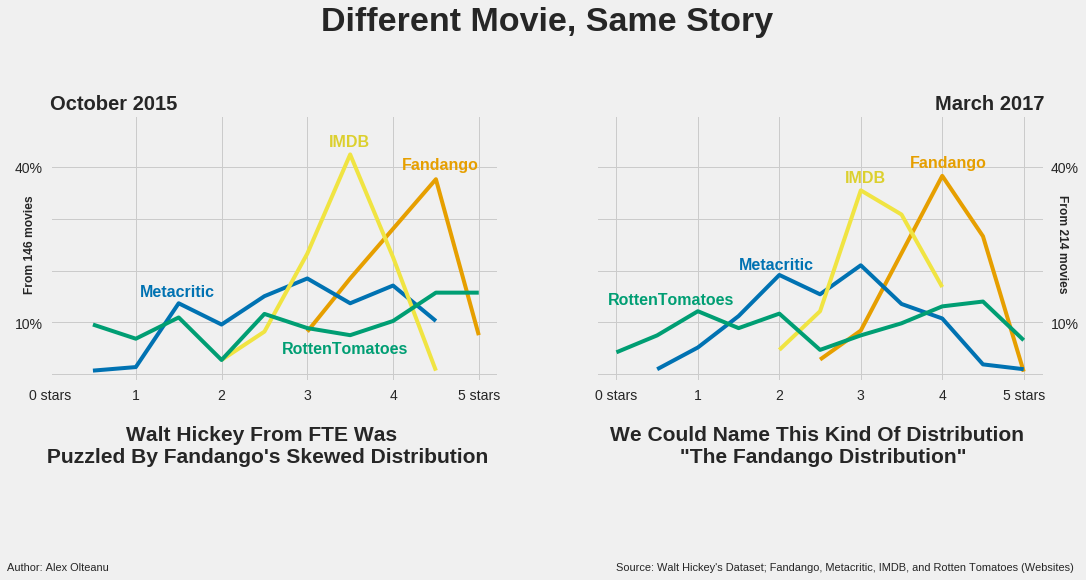

In [10]:
### The graph ###

# Keep the FTE style

# Generate a figure with 2 axes (1 row by 2 columns)
fig = plt.figure(figsize = (17.5, 7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Plot the lines (consider colorblindness when choosing colors)
# FTE dataset
ax1.plot(fte_fdg.index, fte_fdg.values, c = (230/255, 159/255, 0))
ax1.plot(fte_ms.index, fte_ms.values, c = (0, 114/255, 178/255))
ax1.plot(fte_imdb.index, fte_imdb.values, c = (240/255, 228/255, 66/255))
ax1.plot(fte_tmeter.index, fte_tmeter.values, c = (0, 158/255, 115/255))

# New dataset
ax2.plot(fdg_vals.index, fdg_vals.values, c = (230/255, 159/255, 0))
ax2.plot(ms_vals.index, ms_vals.values, c = (0, 114/255, 178/255))
ax2.plot(imdb_vals.index, imdb_vals.values, c = (240/255, 228/255, 66/255))
ax2.plot(tmeter_vals.index, tmeter_vals.values, c = (0, 158/255, 115/255))

# Tweak the axes
# Ax1
# Ticks
ax1.set_yticks([0,10,20,30,40,50])
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_yticklabels(['', '10%', '', '', '40%', '']) # Had to do it this way to keep the gridlines for 0,20, and 30
ax1.set_xticklabels(['0 stars', '1', '2', '3', '4', '5 stars', ])
ax1.tick_params(labelsize = 14) # font size for tick labels
# Legend
ax1.text(3.25,44, 'IMDB', color = (220/255, 208/255, 46/255), fontsize = 16, weight = 'bold')
ax1.text(4.1,39.5, 'Fandango', color = (230/255, 159/255, 0), fontsize = 16, weight = 'bold')
ax1.text(1.05,15.1, 'Metacritic', color = (0, 114/255, 178/255), fontsize = 16, weight = 'bold')
ax1.text(2.7, 4, 'RottenTomatoes', color = (0, 158/255, 115/255), fontsize = 16, weight = 'bold')
ax1.text(-0.3, 33, 'From 146 movies', fontsize = 12, weight = 'bold', rotation = 'vertical')

# Ax2
# Ticksb
ax2.yaxis.tick_right() # moves the y-axis to the right
ax2.set_yticks([0,10,20,30,40,50])
ax2.set_xticks([0,1,2,3,4,5])
ax2.set_yticklabels(['', '10%', '', '', '40%', ''])
ax2.set_xticklabels(['0 stars', '1', '2', '3', '4', '5 stars'])
ax2.tick_params(labelsize = 14)
# Legend
ax2.text(2.8,37, 'IMDB', color = (220/255, 208/255, 46/255), fontsize = 16, weight = 'bold')
ax2.text(3.6,40, 'Fandango', color = (230/255, 159/255, 0), fontsize = 16, weight = 'bold')
ax2.text(1.5,20.2, 'Metacritic', color = (0, 114/255, 178/255), fontsize = 16, weight = 'bold')
ax2.text(-0.1,13.5, 'RottenTomatoes', color = (0, 158/255, 115/255), fontsize = 16, weight = 'bold')
ax2.text(5.4, 33, 'From 214 movies', fontsize = 12, weight = 'bold', rotation = 270)

# Titles & Subtitles
fig.suptitle('Different Movie, Same Story', fontsize = 34, weight = 'bold')
ax1.set_title('October 2015', loc = 'left', weight = 'bold')
ax2.set_title('March 2017', loc = 'right', weight = 'bold')
ax1.text(2.5, -17, 'Walt Hickey From FTE Was \n Puzzled By Fandango\'s Skewed Distribution', fontsize = 21, 
         weight = 'bold', ha = 'center')
ax2.text(2.5, -17, 'We Could Name This Kind Of Distribution \n "The Fandango Distribution"', fontsize = 21, weight = 'bold', ha = 'center')
ax1.text(-0.5, -38, 'Author: Alex Olteanu', fontsize = 11)
ax2.text(0, -38, 'Source: Walt Hickey\'s Dataset; Fandango, Metacritic, IMDB, and Rotten Tomatoes (Websites)', 
         fontsize = 11)
plt.tight_layout(pad = 7) # increases the padding btw the fig title and the axes objects


plt.show()
fig.savefig('small_multiple_fdg.jpg')

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A magnified picture of the changes:

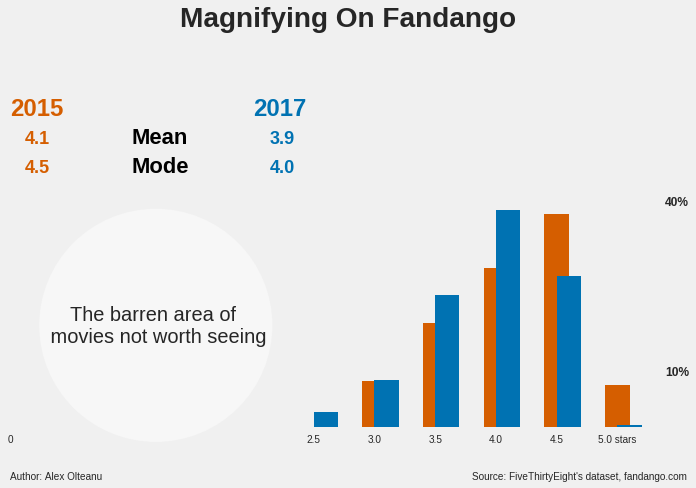

In [60]:
# Keep the FTE style

# One ax
fig, ax = plt.subplots()
fig.set_size_inches(12,7.5)
ax.grid(False) # removes all gridlines

# Plot the bar graphs
ax.bar(fte_fdg.index, fte_fdg.values, width = 0.2, color = (213/255, 94/255, 0)) # red; 2015
ax.bar(fdg_vals.index, fdg_vals.values, width = 0.2, align = 'edge',color = (0/255, 114/255, 178/255)) # blue;2017

# Tweak the graph
from numpy import arange
ax.set_xticks(arange(0,5.1,0.5))
ax.set_xticklabels(('0', '', '', '', '', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0 stars'))
ax.set_yticks(range(0, 70, 10)) 
ax.set_yticklabels(('', '10%', '', '', '40%', '', '', ''), weight = 'bold', fontsize = 12)
ax.yaxis.tick_right()

# Text
ax.text(0, 55, '2015', fontsize = 24, weight = 1000, color = (213/255, 94/255, 0)) # year
ax.text(2, 55, '2017', fontsize = 24, weight = 1000, color = (0/255, 114/255, 178/255)) # year
# Means and modes computed before
ax.text(0.12,50, '4.1', fontsize = 18, weight = 1000, color = (213/255, 94/255, 0)) # mean 2015
ax.text(2.135,50, '3.9', fontsize = 18, weight = 1000, color = (0/255, 114/255, 178/255)) # mean 2017
ax.text(1,50, 'Mean', fontsize = 22, weight = 'bold', color = 'black') # mean 
ax.text(1,45, 'Mode', fontsize = 22, weight = 'bold', color = 'black') # mode
ax.text(0.12,45, '4.5', fontsize = 18, weight = 1000, color = (213/255, 94/255, 0)) # mode 2015
ax.text(2.135,45, '4.0', fontsize = 18, weight = 1000, color = (0/255, 114/255, 178/255)) # mode 2017
ax.text(0, -9, 'Author: Alex Olteanu', fontsize = 10)
ax.text(3.8, -9, 'Source: FiveThirtyEight\'s dataset, fandango.com', fontsize = 10)
ax.annotate("The barren area of \n movies not worth seeing", xy=(0.2, 0.2), xycoords='data', xytext=(1.2, 18), 
            textcoords='data', size=20, va="center", ha="center", bbox=dict(boxstyle="circle", fc="w", alpha = 0.5))
                  
# Title
fig.suptitle('Magnifying On Fandango', fontsize = 28, weight = 'bold')
plt.tight_layout(pad = 6.5) 

plt.show()

### Between the metascore and the IMDB rating, which is the least correlated with the Fandango rating?

In [69]:
# Correlation Values
print(new_ds.corr().loc['fandango'][['metascore', 'imdb']])

metascore    0.378537
imdb         0.633383
Name: fandango, dtype: float64


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The least correlated with the Fandango rating is the metascore. It has a Pearson’s r value of 0.38 with respect to Fandango, while the IMDB rating has a value of 0.63.
Now let me explain all this. 
As two variables change, taking different values, they are correlated if there’s a pattern corresponding to both changes. Measuring [correlation][1] simply means measuring the extent to which there is such a pattern. One of the ways to perform this measure is to compute the Pearson’s r. If the value is +1.0, it means there’s a perfect positive correlation, and if it’s -1.0, it means there’s a perfect negative correlation. The extent to which the variables are correlated decrease as the Pearson’s r approaches 0, from both the negative and the positive side. Let’s better visualize this:

[1]: http://www.mathsisfun.com/data/correlation.html

<figure>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png" alt="Pearson's r">
<center><figcaption><b>Visualizing Pearson's r Values (Author: Denis Boigelot; Source: Wikipedia)</b></figcaption></center>
<figure>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now, to put the abstraction above into context, if we compare how the values for two rating types (say Fandango’s and IMDB’s) change, we can determine the degree to which there’s a pattern corresponding to both changes. Given the correlation coefficients just mentioned, there is a pattern between Fandango and IMDB to a greater extent than is for Fandango and the metascore. Both coefficients are positive, and, as such, the correlation is said to be positive, which means that as Fandango’s ratings go up, IMDB’s ratings tend to go up as well, more than the metascores do. 
Put differently, for any given movie rating on Fandango, it is more probable that the metascore is going to be more different from it than the IMDB rating.

### The metascore: how it works & downsides

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; All in all, I recommend checking the metascore whenever you are looking for a movie rating.
In a nutshell, the metascore is a weighted average of many reviews coming from reputed critics. The Metacritic team reads the reviews and assigns each a 0–100 score, which is then given a weight, mainly based on the review’s quality and source. More about their rating system can be found [here][1]. 
Now, I just want to point out a few downsides of the metascore: 
- the weighting coefficients are confidential, so you won’t get to see the extent to which each review counted in the metascore; 
- you will have a rough time finding metascores for less-known movies that appeared before 1999, the year Metacritic was created; 
- some recent movies whose main language is not English, not only that don’t have a metascore, they are not even listed on Metacritic — for example, the Romanian movies [Two Lottery Tickets (2016)][2] and [Eastern Business (2016)][3] are not listed on Metacritic, while on IMDB are, being also rated.

### Few more words
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; To sum up, in this article I made a single recommendation of where to look for a movie rating. I recommended the metascore, based on two arguments: its distribution resembles the most a normal one, and it is the least correlated with the Fandango rating.

[1]: http://www.metacritic.com/faq#item11
[2]: http://www.imdb.com/title/tt5700224/?ref_=nv_sr_1
[3]: http://www.imdb.com/title/tt5610362/?ref_=nv_sr_2

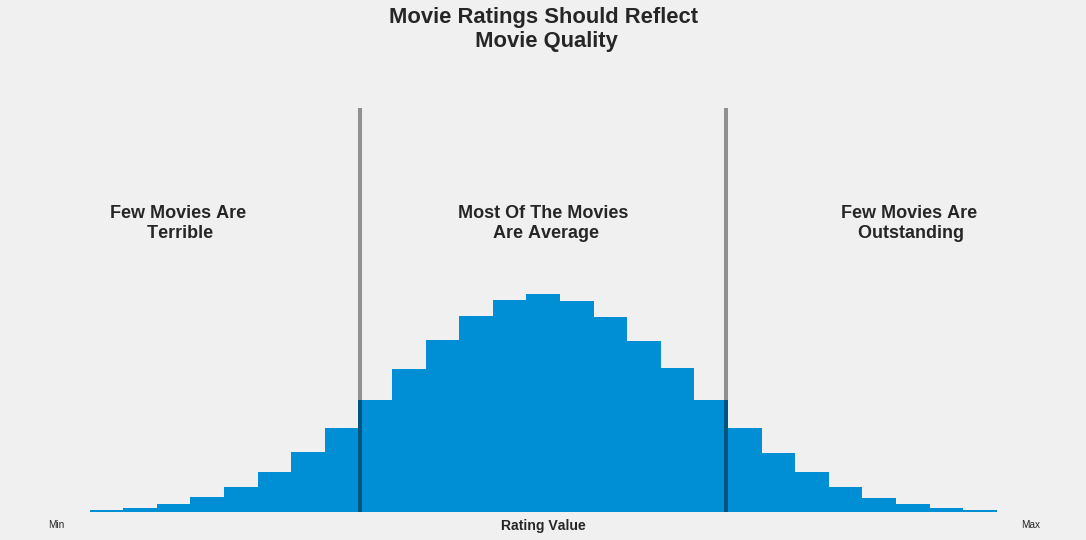

In [70]:
### Generating the top-image ###

# Keep the fivethirtyeight style (remains from above)

# Generate a figure with a single ax
fig, ax = plt.subplots(figsize = (18,9))

# Generate a hist on the ax; normal was imported earlier from numpy.random
ax.hist(normal(size = 1000000, scale = 6), bins = 29, range = (-20, 20))

# Hide grid and tweak tick parameters
ax.grid(False)

ax.set_yticks([0, 170000])
ax.tick_params(axis = 'both', which = 'both', labelleft = False)

ax.set_xticks([-20,20])
ax.set_xticklabels(['Min', 'Max'])

# Explanatory text
ax.text(0, -7000, 'Rating Value', weight = 'bold', fontsize = 14, ha = 'center')
ax.text(0,115000, 'Most Of The Movies\n Are Average', fontsize = 18, weight = 'bold', ha ='center')
ax.text(-15,115000, 'Few Movies Are\n Terrible', fontsize = 18, weight = 'bold', ha ='center')
ax.text(15,115000, 'Few Movies Are\n Outstanding', fontsize = 18, weight = 'bold', ha ='center')
fig.suptitle('Movie Ratings Should Reflect\n Movie Quality', fontsize = 22, weight = 'bold')

# Delimitating areas
ax.axvline(-7.5, color = 'black', alpha = 0.4)
ax.axvline(7.5, color = 'black', alpha = 0.4)

# Increase the pad btw title and graph
plt.tight_layout(pad = 8)

plt.show()